In [126]:
# Dependencies
import os
import requests
import pandas as pd
from config import gmaps_key
from pprint import pprint
import gmaps
import matplotlib.pyplot as plt
import imageio
import numpy as np
import math

In [127]:
# Import google API key
from config import gmaps_key
# Setup Google Maps API
gmaps.configure(api_key=gmaps_key)

In [4]:
# Combine raw data into a data frame
yrs_15to18_path = os.path.join("data","crash_data_2015-2018.csv")
yrs_19to21_path = os.path.join("data","crash_data_2019-2021.csv")
years_15to18 = pd.read_csv(yrs_15to18_path)
years_19to21 = pd.read_csv(yrs_19to21_path)
crash_df = pd.concat([years_19to21,years_15to18],ignore_index=True)
crash_df

,CRASH_DATE,CRASH_TIME,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,LATITUDE,LONGITUDE
0,1/7/2021,3:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,W,3,NO INDICATION OF INJURY,0.0,0.0,3,41.924260,-87.753029
1,1/7/2021,0:30,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,UNABLE TO DETERMINE,N,2,NONINCAPACITATING INJURY,1.0,0.0,0,41.902701,-87.711526
2,1/7/2021,0:26,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,N,3,NO INDICATION OF INJURY,0.0,0.0,0,41.935010,-87.756408
3,1/7/2021,0:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,S,1,NONINCAPACITATING INJURY,2.0,0.0,0,41.838327,-87.617613
4,1/6/2021,23:21,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,W,2,NO INDICATION OF INJURY,0.0,0.0,23,41.881926,-87.745462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467652,8/4/2015,8:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,DISREGARDING TRAFFIC SIGNALS,S,2,"REPORTED, NOT EVIDENT",1.0,0.0,8,41.816471,-87.621551
467653,8/4/2015,5:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,NOT APPLICABLE,N,2,NO INDICATION OF INJURY,0.0,0.0,5,41.881057,-87.771673
467654,8/3/2015,18:37,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,N,2,NO INDICATION OF INJURY,0.0,0.0,18,41.896980,-87.656687
467655,8/3/2015,15:30,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",FOLLOWING TOO CLOSELY,N,2,NO INDICATION OF INJURY,0.0,0.0,15,41.912188,-87.680491


In [5]:
crash_columns = crash_df.columns
print(crash_columns)

Index(['CRASH_DATE', 'CRASH_TIME', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'CRASH_HOUR', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


#### What impacts crash type the most? - Romi

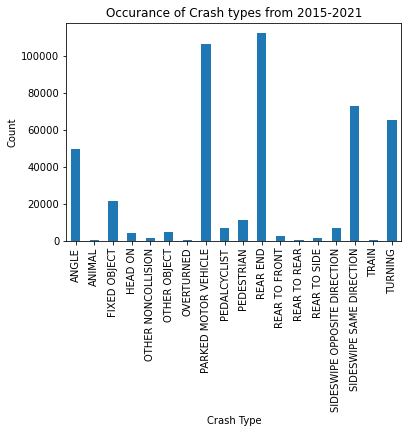

<Figure size 432x288 with 0 Axes>

In [6]:
# Create first crash type bar graph
grouped_crashes = crash_df.groupby(["FIRST_CRASH_TYPE"])
crash_count = grouped_crashes["FIRST_CRASH_TYPE"].count()
crash_chart = crash_count.plot(kind='bar')
crash_chart.set_xlabel("Crash Type")
crash_chart.set_ylabel("Count")
crash_chart.set_title("Occurance of Crash types from 2015-2021")
plt.show()
plt.tight_layout()

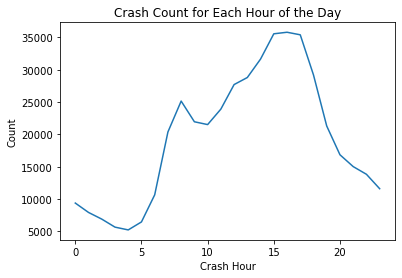

<Figure size 432x288 with 0 Axes>

In [11]:
# Create crash count per hour (histogram/line)
crashes_per_hour_grouped = crash_df.groupby(["CRASH_HOUR"])
hour_count = crashes_per_hour_grouped["CRASH_HOUR"].count()
hour_chart_line = hour_count.plot(kind='line')
hour_chart_line.set_xlabel("Crash Hour")
hour_chart_line.set_ylabel("Count")
hour_chart_line.set_title("Crash Count for Each Hour of the Day")
plt.show()
plt.tight_layout()

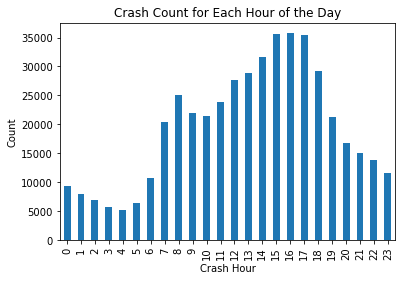

<Figure size 432x288 with 0 Axes>

In [12]:
hour_chart_bar = hour_count.plot(kind='bar')
hour_chart_bar.set_xlabel("Crash Hour")
hour_chart_bar.set_ylabel("Count")
hour_chart_bar.set_title("Crash Count for Each Hour of the Day")
plt.show()
plt.tight_layout()

[]

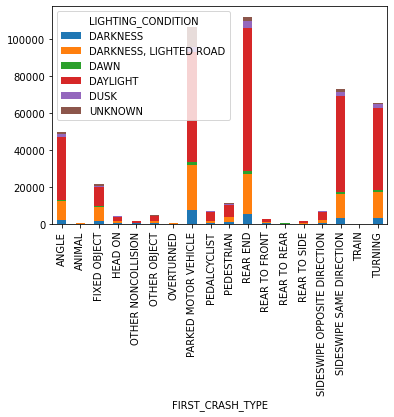

In [9]:
# Create first crash type vs. lighting graph (stacked bar graph)
lighting_crash_plot = crash_df.groupby(['FIRST_CRASH_TYPE', 'LIGHTING_CONDITION']).size().unstack().plot(kind='bar', stacked=True)
plt.plot()

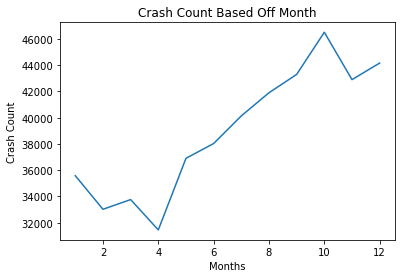

<Figure size 432x288 with 0 Axes>

In [10]:
# Create hit and run vs month (line) -analysis correlation to holidays
new_crash_df = crash_df
new_crash_df['Month'] = pd.DatetimeIndex(new_crash_df['CRASH_DATE']).month
month_grouped = new_crash_df.groupby(["Month"])
month_count = month_grouped["Month"].count()
month_chart = month_count.plot(kind='line')
month_chart.set_xlabel("Months")
month_chart.set_ylabel("Crash Count")
month_chart.set_title("Crash Count Based Off Month")
plt.show()
plt.tight_layout()

#### What type of injuries are caused by what types of crashes? - Jonathan

In [ ]:
# Create cost of damage and injury count (pie chart)
damage_group = crash_df.groupby("DAMAGE")
injury_count = damage_group["INJURIES_TOTAL"].count()
damage_inj_df = pd.DataFrame(injury_count)                            

#damage_inj_df

labels = list(damage_inj_df.index.values)
injuries = damage_inj_df["INJURIES_TOTAL"]
explode = (0,0,0.1)
#print(damage_inj_df.index)

plt.pie(injuries, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode)
plt.title("Injury % by Cost of Damage Groups")
plt.axis('equal')
#plt.xlabel("Cost of Damage")
#plt.ylabel("Injury Count")

plt.savefig("output_data/injuries_by_cost_of_damage_group.png")

In [ ]:
# Create cost of damage and fatal injury count (scatter with regression)
fatal_count = damage_group["INJURIES_FATAL"].count()
damages_fatal_df = pd.DataFrame(fatal_count)

#print(damages_fatal_df)
x_labels = list(damage_inj_df.index.values)
y_values = fatal_count

plt.bar(x_labels, y_values, color=["yellow", "orange", "tomato"], edgecolor="black")
plt.title("Cost of Damage vs. # of Fatal Injuries")
plt.xlabel("Cost of Damage Group")
plt.ylabel("# of Fatal Injuries")

plt.savefig("output_data/cost_of_damage_vs_fatalities.png")

In [ ]:
# Create speed vs. fatality count (scatter with regression)

#### What types of wrecks occur based off location? - Bankston

In [ ]:
# Create bar graph for trafficway_type

In [ ]:
# Create heat map for total injuries by location

In [ ]:
# Create heat map for fatal injuries by location

#### Create heat map of crashes by location with location of high schools plotted - Baker

In [128]:
# Remove non-applicable coordinates (NaN and outside city limits)
locdata = crash_df.loc[(crash_df["LATITUDE"] >= 41) & \
                                  (crash_df["LATITUDE"] <= 43) & \
                                  (crash_df["LONGITUDE"] >= -88) & \
                                  (crash_df["LONGITUDE"] <= -87), ["LATITUDE","LONGITUDE"]]

In [129]:
# Bin crashes into equally sized boxes by geography:
# Assign each crash to a geographic box
sections = 10 # total number of boxes is this number**2
locdata["LAT_BIN"] = pd.qcut(locdata["LATITUDE"], sections, labels=False) + 1
locdata["LNG_BIN"] = pd.qcut(locdata["LONGITUDE"], sections, labels=False) + 1
locdata["BOX_NUM"] = locdata["LNG_BIN"] + (sections * (locdata["LAT_BIN"]-1))
locdata

,LATITUDE,LONGITUDE,LAT_BIN,LNG_BIN,BOX_NUM
0,41.924260,-87.753029,8,2,72
1,41.902701,-87.711526,7,3,63
2,41.935010,-87.756408,8,2,72
3,41.838327,-87.617613,4,9,39
4,41.881926,-87.745462,6,2,52
...,...,...,...,...,...
467652,41.816471,-87.621551,4,9,39
467653,41.881057,-87.771673,6,1,51
467654,41.896980,-87.656687,7,7,67
467655,41.912188,-87.680491,8,5,75


In [130]:
# get counts of each box to be used as intensities in the heat map
crash_per_box = pd.DataFrame({})
crash_per_box["COUNT"] = locdata["BOX_NUM"].value_counts().sort_index()
crash_per_box

,COUNT
2,336
3,1498
4,1605
5,3455
6,5232
...,...
93,3105
94,8341
95,8098
96,10048


In [131]:
# generate coordinate for each square based on the average latitude and longitude of all crashes in that square
crash_per_box["LAT"] = ""
crash_per_box["LNG"] = ""
for box in list(crash_per_box.index):
    box_df = locdata.loc[locdata["BOX_NUM"] == box,["LATITUDE","LONGITUDE"]]
    crash_per_box.loc[box,"LAT"] = box_df["LATITUDE"].mean()
    crash_per_box.loc[box,"LNG"] = box_df["LONGITUDE"].mean()
crash_per_box

,COUNT,LAT,LNG
2,336,41.7216,-87.738
3,1498,41.7104,-87.7188
4,1605,41.7054,-87.7009
5,3455,41.7081,-87.6811
6,5232,41.7094,-87.6641
...,...,...,...
93,3105,41.9836,-87.7175
94,8341,41.9938,-87.6992
95,8098,41.997,-87.6825
96,10048,41.9926,-87.6652


In [132]:
# Generate heat map using the BOX_COORD as the coordinates and crash_per_box as the intensity
fig_lat = locdata["LATITUDE"].median()
fig_lng = locdata["LONGITUDE"].median()
fig1 = gmaps.figure(layout={"height":"900px","width":"600px"},center=(fig_lat, fig_lng),zoom_level=11)
box_coordinates = crash_per_box[["LAT","LNG"]]
intensity = crash_per_box["COUNT"]
heat_layer = gmaps.heatmap_layer(box_coordinates, weights=intensity, dissipating=False, max_intensity=intensity.max(), point_radius=.03)
fig1.add_layer(heat_layer)

In [133]:
# Get center coordinates of data and call google api for high schools in the area
center = f"{locdata['LATITUDE'].mean()},{locdata['LONGITUDE'].mean()}"

In [164]:
# Call google api for high schools within 30000 meters (~18 miles)
base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
params = {
    "key": gmaps_key,
    "query": "high school",
    "location": center,
    "radius": "30000"
}
response = requests.get(base_url,params=params).json()

In [162]:
# Store high school data
results = response["results"]
schools_df = pd.DataFrame({})
schools_df["name"] = [results[i]["name"] for i in range(len(results))]
schools_df["lat"] = [results[i]["geometry"]["location"]["lat"] for i in range(len(results))]
schools_df["lng"] = [results[i]["geometry"]["location"]["lng"] for i in range(len(results))]
schools_df["address"] = [results[i]["formatted_address"][:-len(", United States")] for i in range(len(results))]

In [163]:
# Plot location of high schools
school_coordinates = schools_df[["lat","lng"]].astype(float)
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Address</dt><dd>{address}</dd>
</dl>
"""
school_info = [info_box_template.format(**row) for index, row in schools_df.iterrows()]
markers = gmaps.marker_layer(school_coordinates, info_box_content=school_info)
fig1.add_layer(markers)
fig1

Figure(layout=FigureLayout(height='900px', width='600px'))

#### What weird connections can we make?

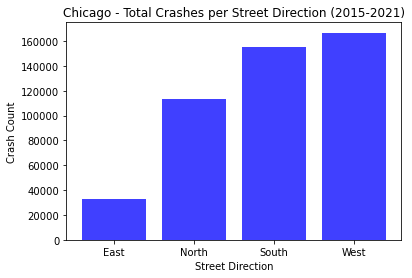

In [80]:
# Create direction facing bar graph (NSEW)
dir_values = crash_df.groupby(["STREET_DIRECTION"])["STREET_DIRECTION"].count()
# get the index for the x-axis but change the initials to the full cardinal direction (W => West)
x = ["East", "North", "South", "West"]
y = dir_values.values
plt.bar(x, y, color='blue', alpha =.75, align='center')
plt.title("Chicago - Total Crashes per Street Direction (2015-2021)")
plt.xlabel("Street Direction")
plt.ylabel("Crash Count")
plt.show()

In [81]:
sub_df = crash_df.loc[crash_df["CRASH_HOUR"] == 0, ["CRASH_HOUR","STREET_DIRECTION"]]
sub_df

,CRASH_HOUR,STREET_DIRECTION
1,0,N
2,0,N
3,0,S
146,0,W
147,0,S
...,...,...
467111,0,W
467251,0,S
467305,0,W
467417,0,W


In [90]:
# format the time for the title of each slide in the gif
def formatHour(h_num):
    if h_num < 12:
        ampm = "AM"
    else:
        ampm = "PM"
        h_num -= 12
    if h_num == 0:
        h_num = 12
    return f"{h_num}{ampm}"

In [123]:
# generate the color for each slide in the gif -- black to yellow to black (signifies night to day to night)
def generateColor(h_num):
    col_eq = (-.5 * math.cos(h_num/4)) + .5
    r = col_eq
    g = col_eq * (241/255)
    b = col_eq * (31/255)
    return (r,g,b)

In [124]:
# Create gif of street direction crash data over time
# Gif creation resource: https://ndres.me/post/matplotlib-animated-gifs-easily/
def plotDirectionsOverTime(df,h):
    sub_df = df.loc[df["CRASH_HOUR"] == h, ["STREET_DIRECTION"]]
    y = sub_df.groupby(["STREET_DIRECTION"])["STREET_DIRECTION"].count()
    x = ["East", "North", "South", "West"]
    fig2, ax2 = plt.subplots(figsize=(16,9))
    ax2.bar(x,y,color=generateColor(h))
    formatted_h = formatHour(h)
    ax2.set(xlabel="Street Direction", \
            ylabel="Crash Count", \
            title="Chicago - Crashes per Street Direction at {}".format(formatted_h))
    ax2.set_ylim(0, 13000)
    fig2.canvas.draw()
    image = np.frombuffer(fig2.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig2.canvas.get_width_height()[::-1] + (3,))
    return image

<ipython-input-124-dc38c58e5c4d>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2, ax2 = plt.subplots(figsize=(16,9))


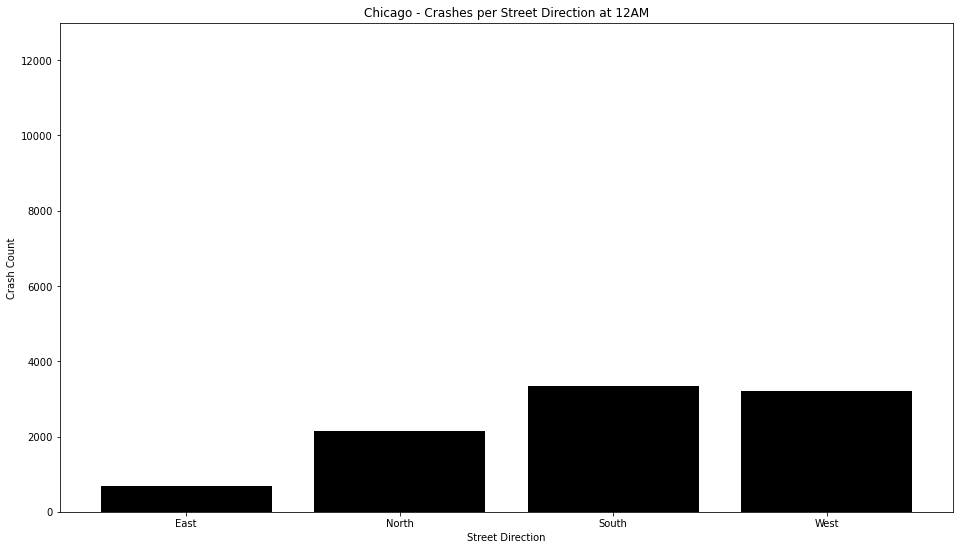

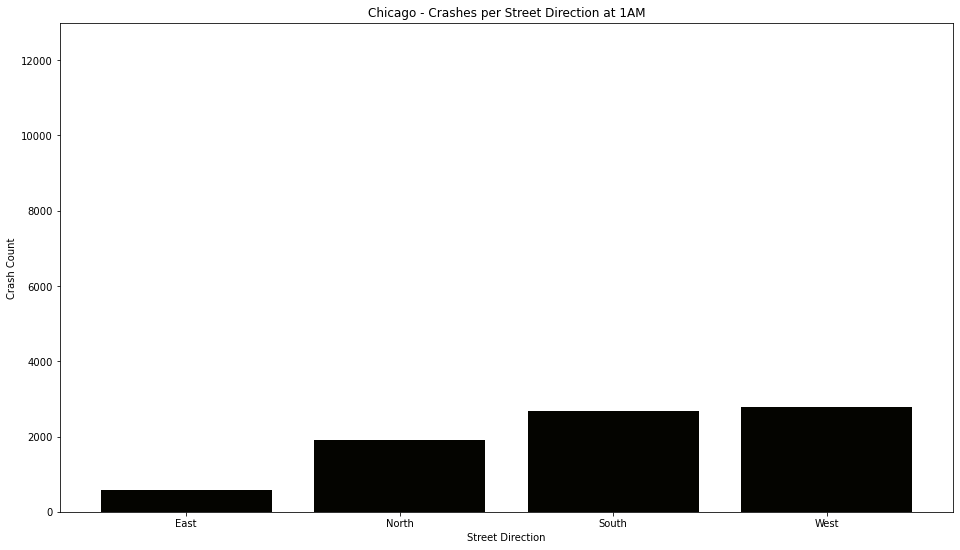

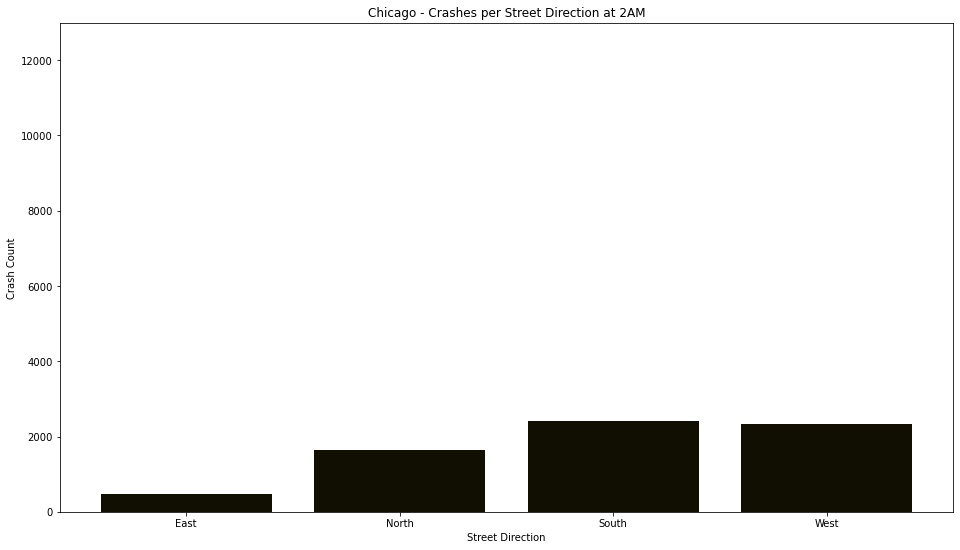

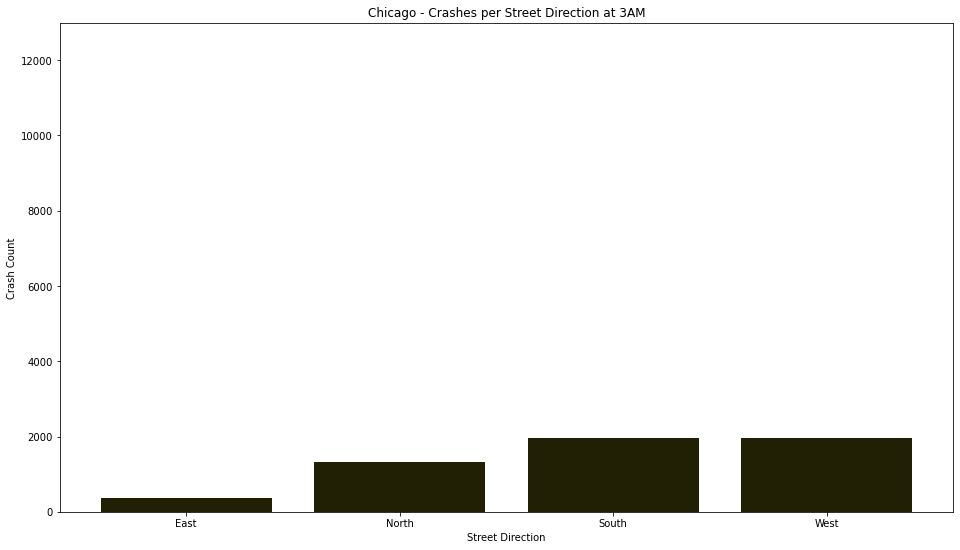

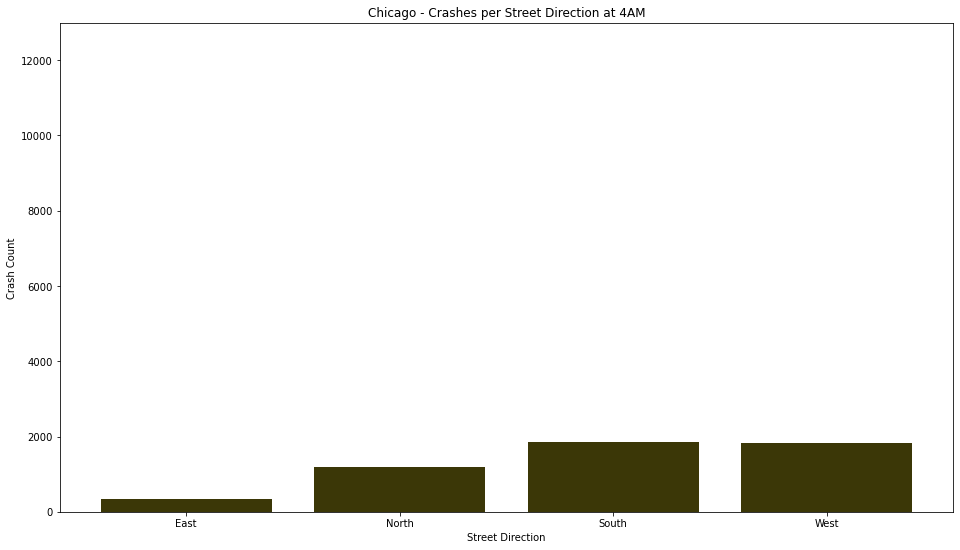

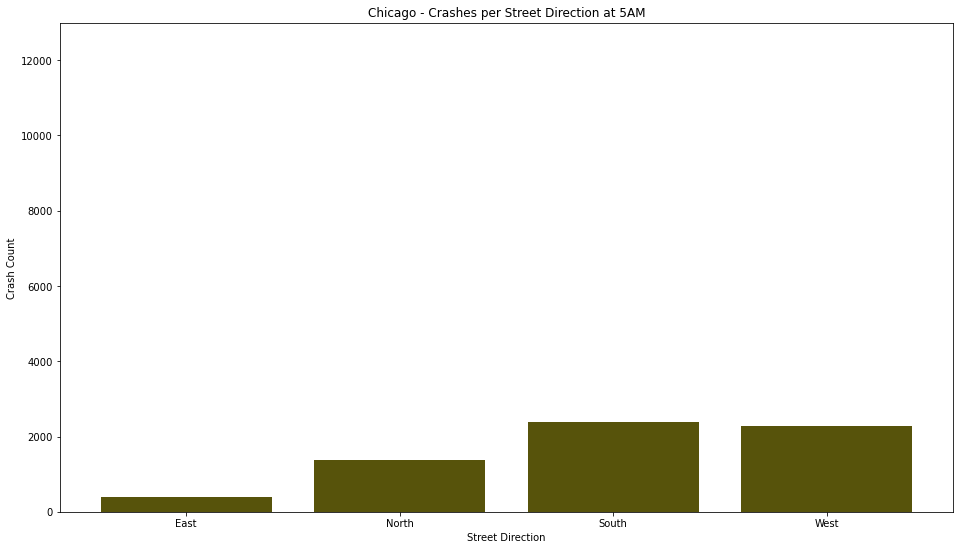

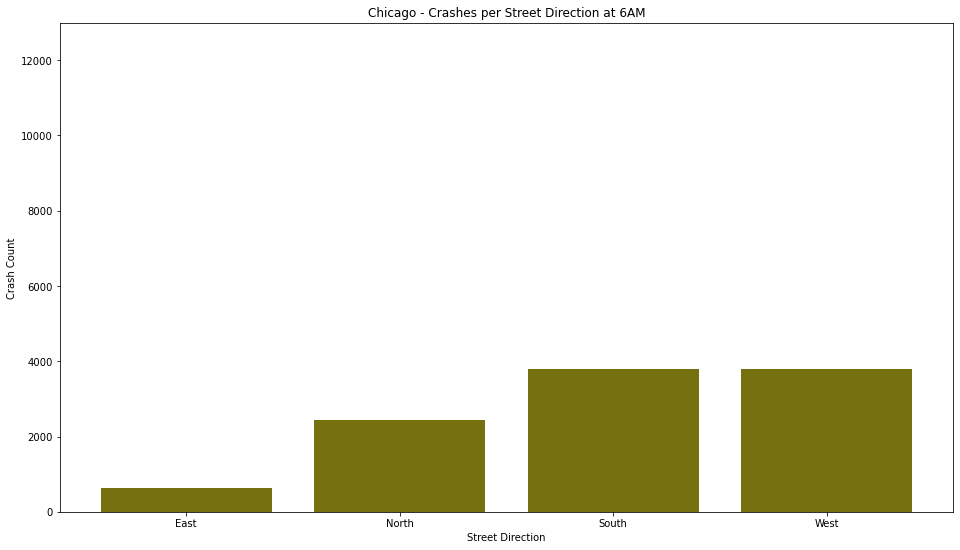

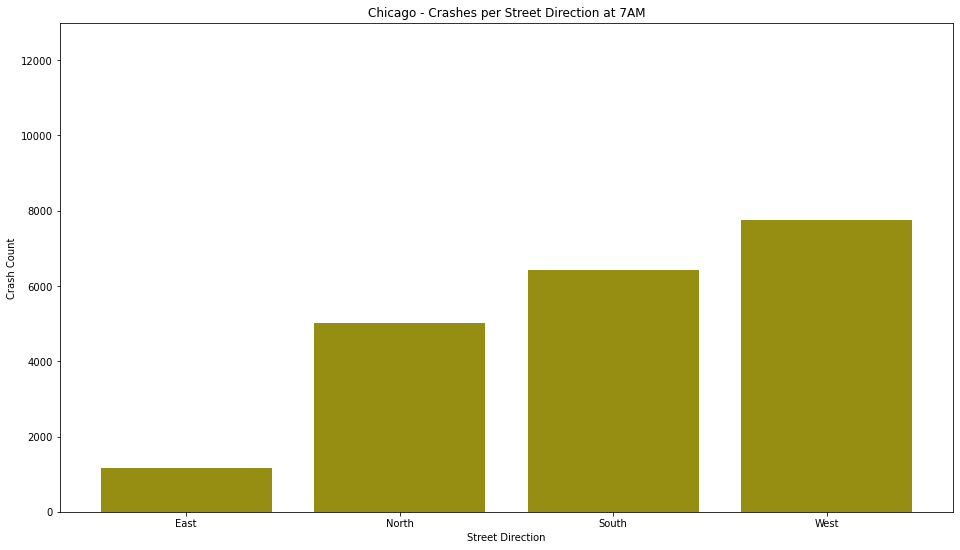

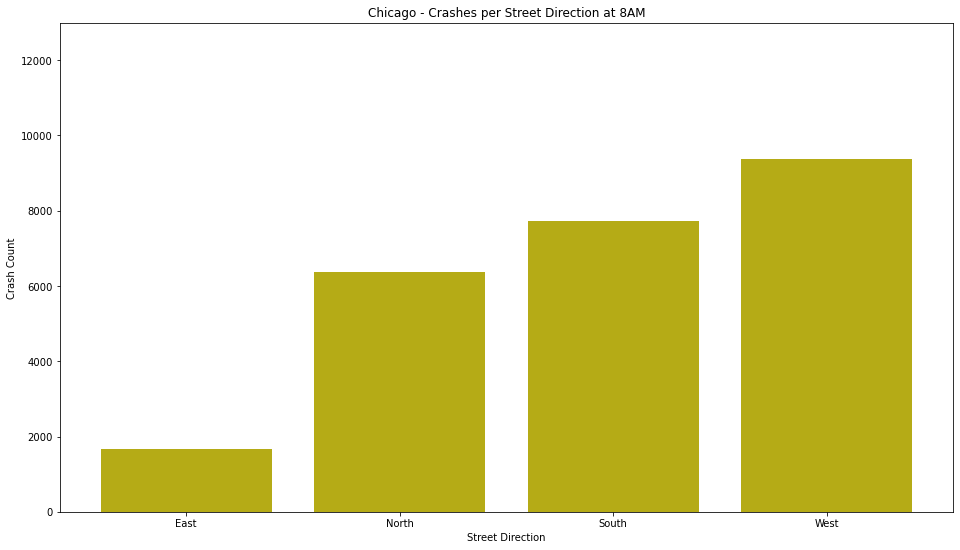

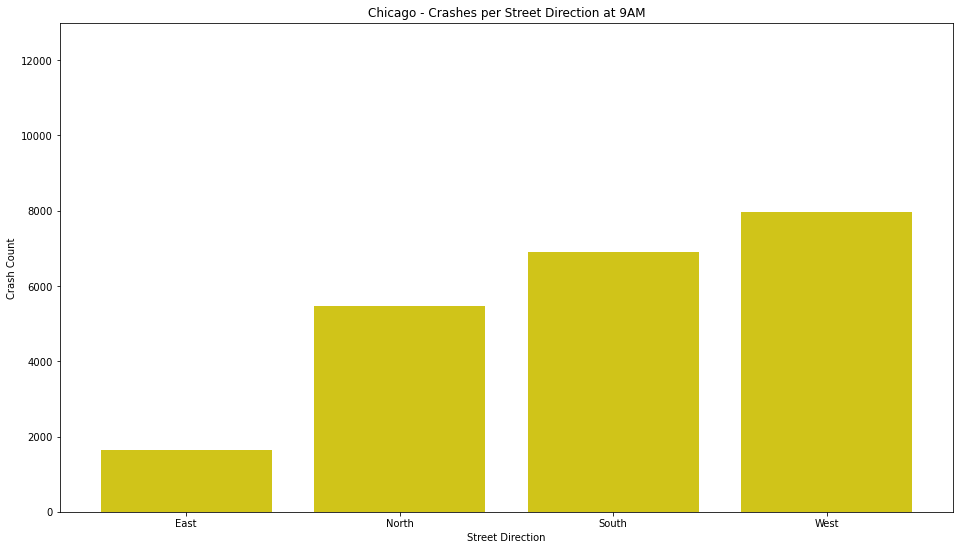

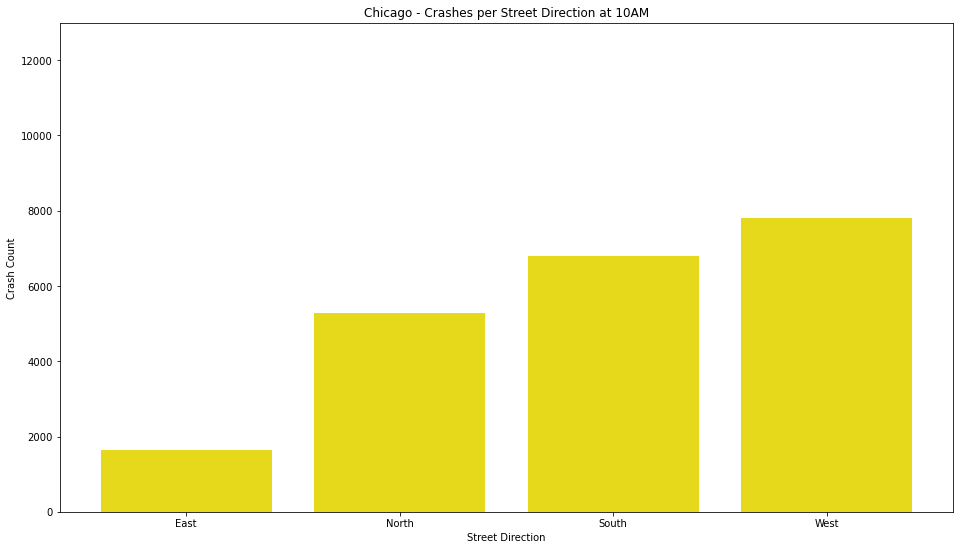

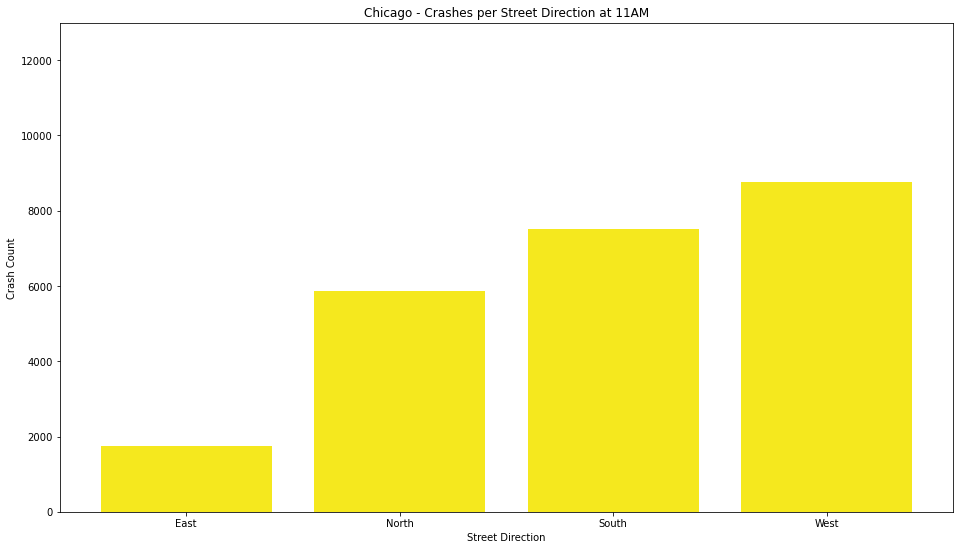

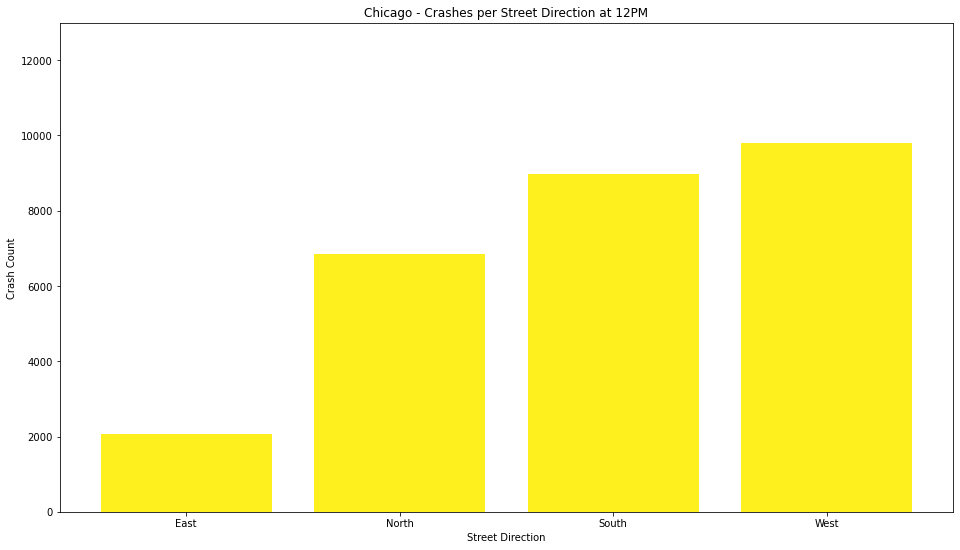

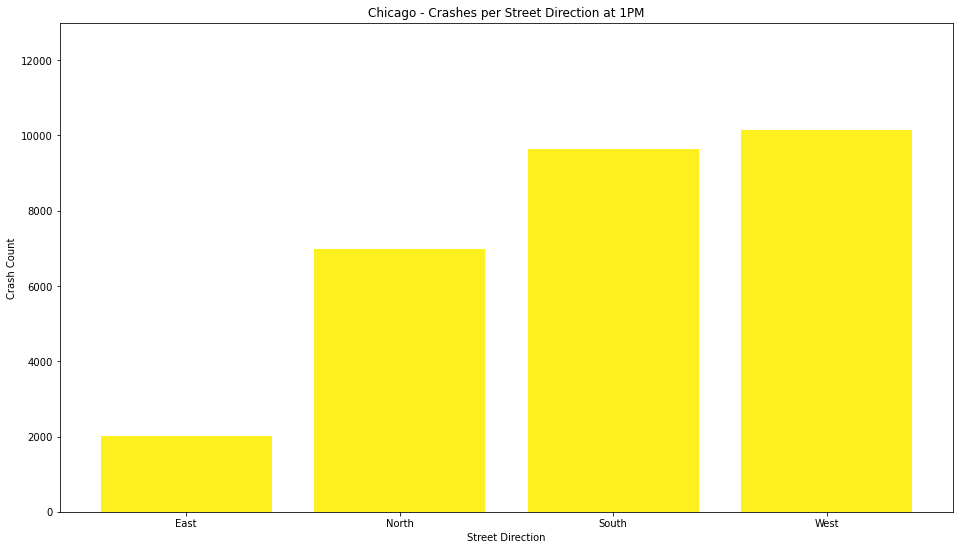

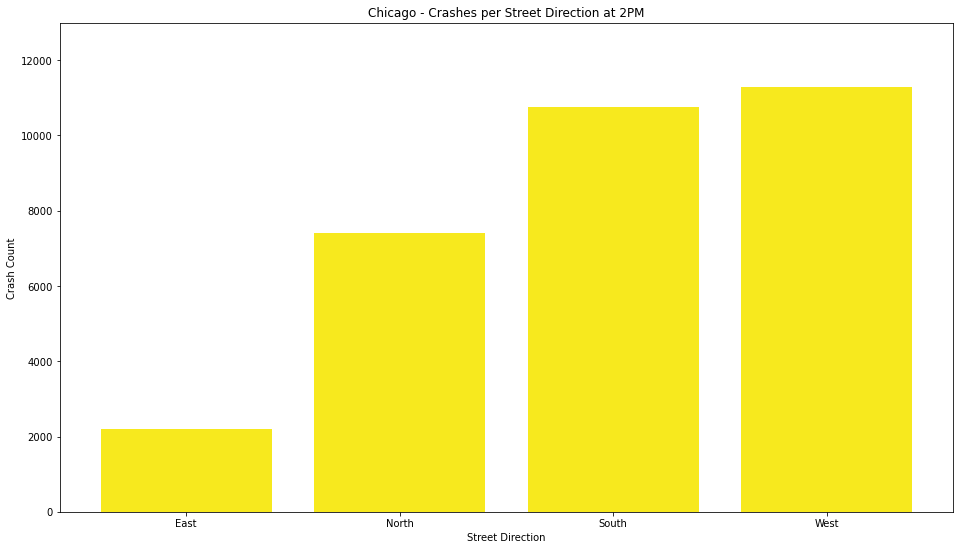

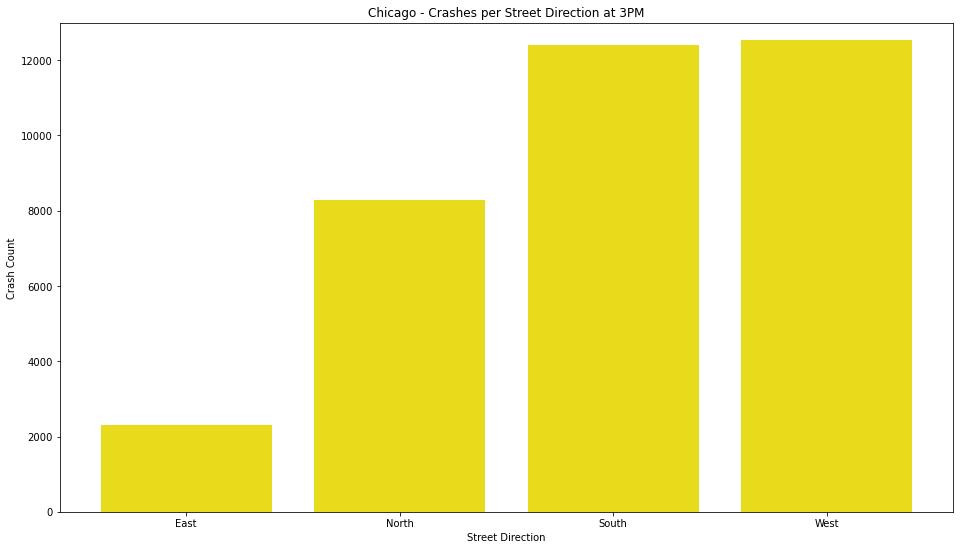

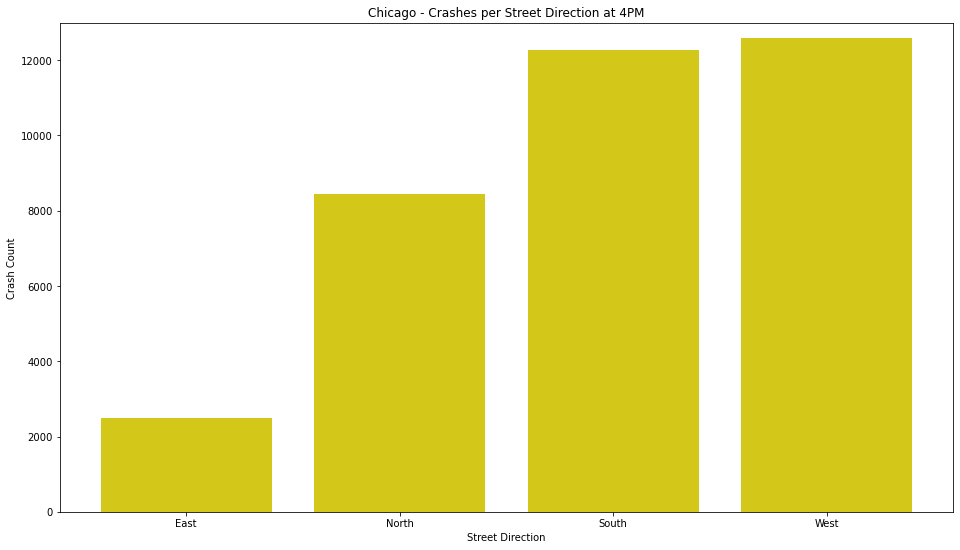

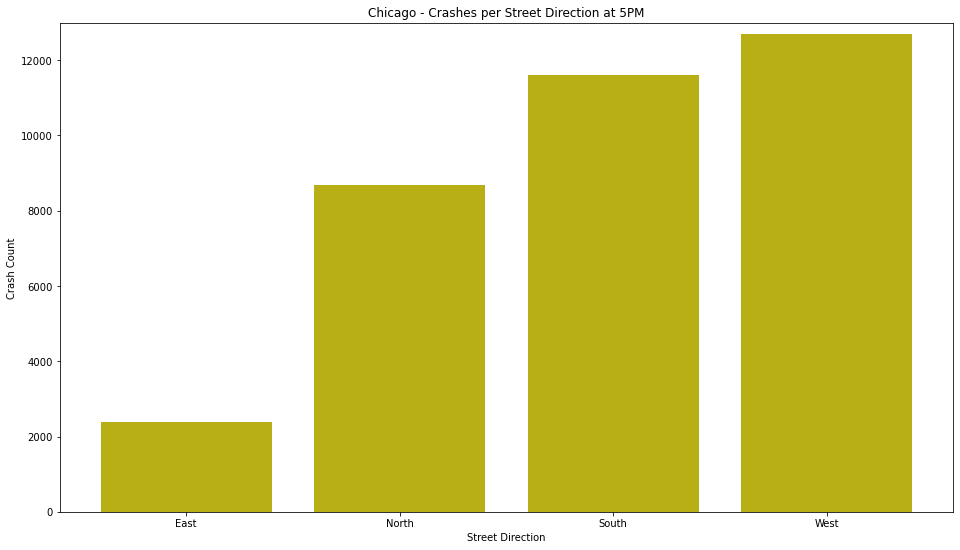

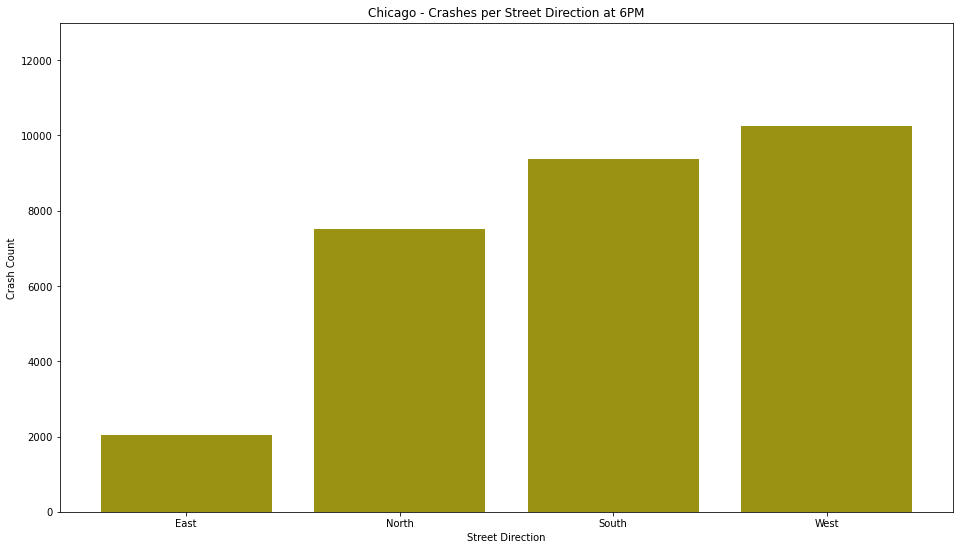

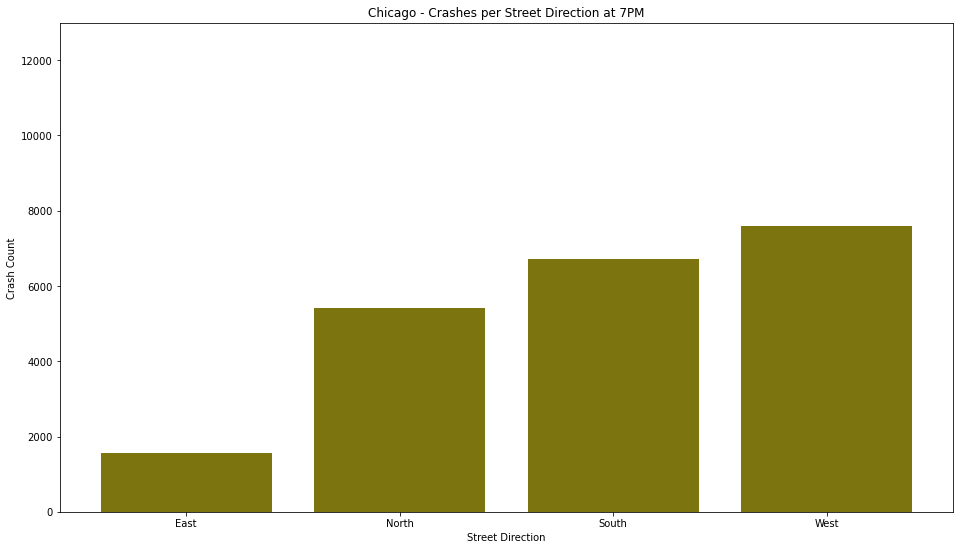

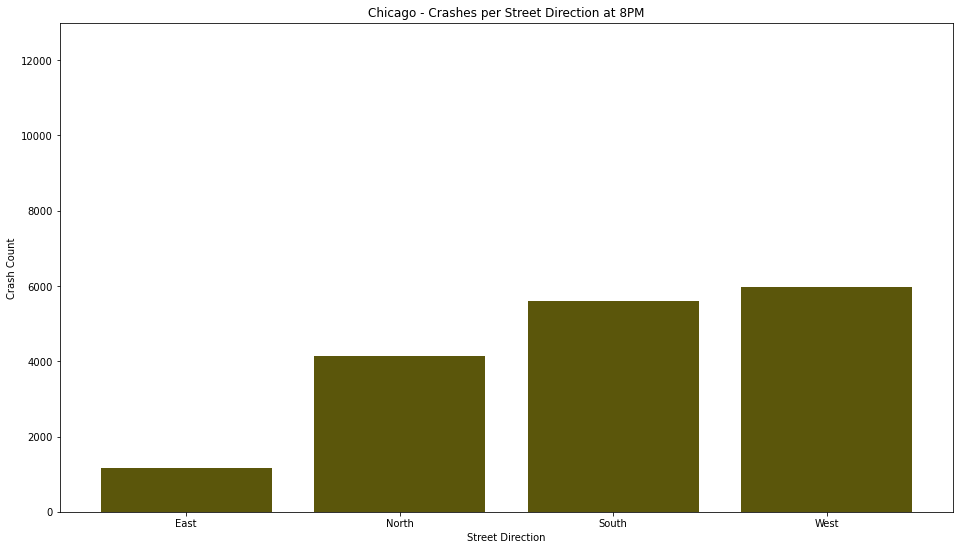

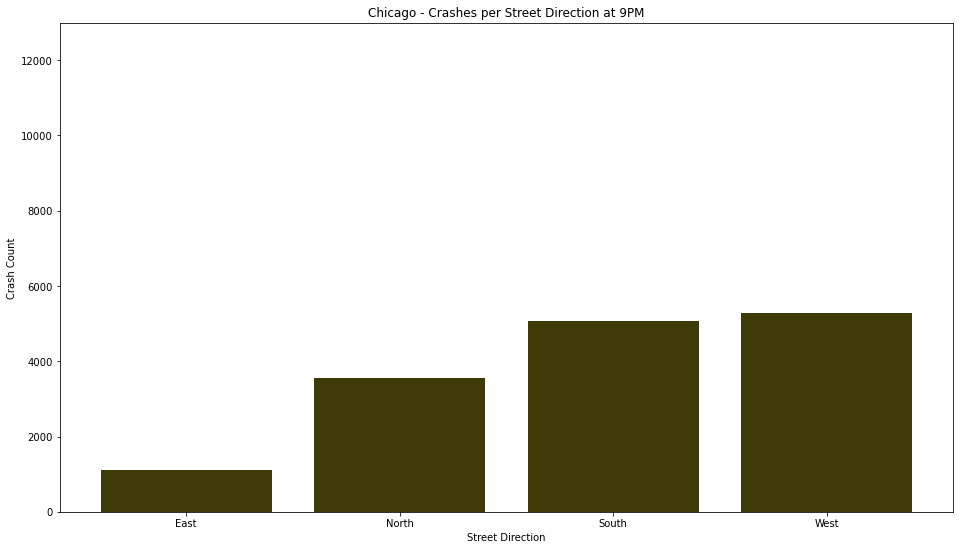

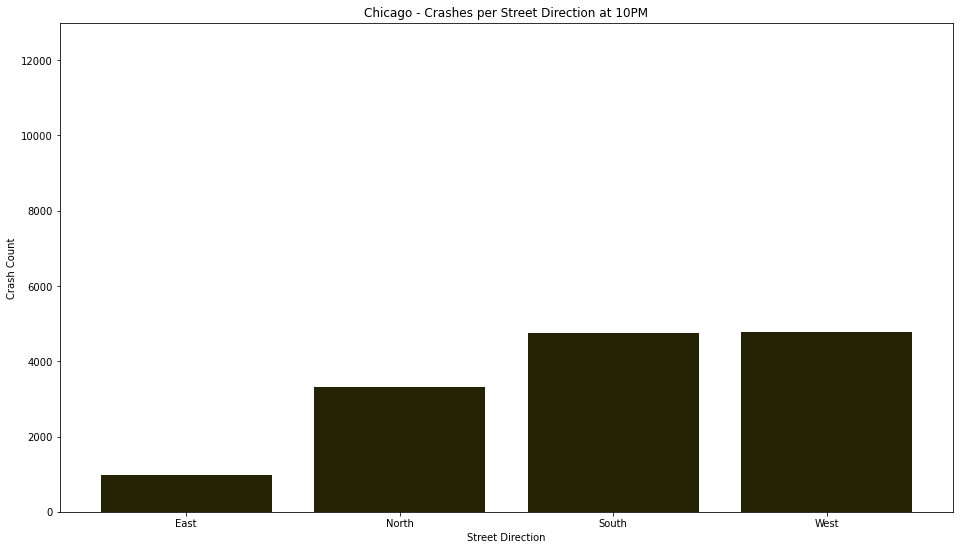

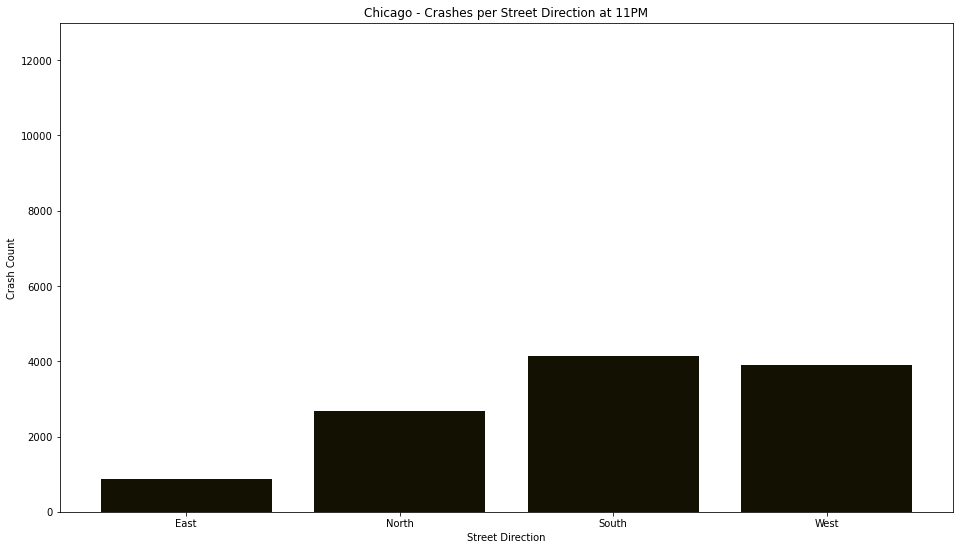

In [125]:
imageio.mimsave('output_data/directionovertime.gif', [plotDirectionsOverTime(crash_df, i) for i in range(24)], fps=1)

In [ ]:
# Andrew
# Pull in dataset for moon phases
# Create crash count vs. moon phases